In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Natural_Disasters_Emergency_Events_Database.csv to Natural_Disasters_Emergency_Events_Database.csv


In [ ]:
df = pd.read_csv("Natural_Disasters_Emergency_Events_Database.csv", sep=";", engine="python")

In [ ]:
print("Shape of dataset:", df.shape)

Shape of dataset: (10431, 13)


In [ ]:
print("\nColumn names:\n", df.columns)


Column names:
 Index(['Year', 'Country', 'ISO', 'Disaster Group', 'Disaster Subroup',
       'Disaster Type', 'Disaster Subtype', 'Total Events', 'Total Affected',
       'Total Deaths', 'Total Damage (USD, original)',
       'Total Damage (USD, adjusted)', 'CPI'],
      dtype='object')


In [ ]:
print("\nFirst 5 rows:\n", df.head())


First 5 rows:
    Year     Country  ISO Disaster Group Disaster Subroup      Disaster Type  \
0  1900  Cabo Verde  CPV        Natural   Climatological            Drought   
1  1900       India  IND        Natural   Climatological            Drought   
2  1900     Jamaica  JAM        Natural     Hydrological              Flood   
3  1900       Japan  JPN        Natural      Geophysical  Volcanic activity   
4  1900      Turkey  TUR        Natural      Geophysical         Earthquake   

  Disaster Subtype  Total Events  Total Affected  Total Deaths  \
0          Drought             1             NaN       11000.0   
1          Drought             1             NaN     1250000.0   
2              NaN             1             NaN         300.0   
3         Ash fall             1             NaN          30.0   
4  Ground movement             1             NaN         140.0   

   Total Damage (USD, original)  Total Damage (USD, adjusted)              CPI  
0                           NaN

In [ ]:
print("\nDataset Info:\n")
print(df.info())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10431 entries, 0 to 10430
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          10431 non-null  int64  
 1   Country                       10431 non-null  object 
 2   ISO                           10431 non-null  object 
 3   Disaster Group                10431 non-null  object 
 4   Disaster Subroup              10431 non-null  object 
 5   Disaster Type                 10431 non-null  object 
 6   Disaster Subtype              8298 non-null   object 
 7   Total Events                  10431 non-null  int64  
 8   Total Affected                7586 non-null   float64
 9   Total Deaths                  7375 non-null   float64
 10  Total Damage (USD, original)  3834 non-null   float64
 11  Total Damage (USD, adjusted)  3830 non-null   float64
 12  CPI                           10380 non-null

In [ ]:
print("\nMissing values per column:\n")
print(df.isnull().sum())


Missing values per column:

Year                               0
Country                            0
ISO                                0
Disaster Group                     0
Disaster Subroup                   0
Disaster Type                      0
Disaster Subtype                2133
Total Events                       0
Total Affected                  2845
Total Deaths                    3056
Total Damage (USD, original)    6597
Total Damage (USD, adjusted)    6601
CPI                               51
dtype: int64


In [ ]:
print("\nSummary statistics:\n")
print(df.describe())


Summary statistics:

               Year  Total Events  Total Affected  Total Deaths  \
count  10431.000000  10431.000000    7.586000e+03  7.375000e+03   
mean    1995.609625      1.446649    1.125969e+06  3.107711e+03   
std       22.001186      1.246589    9.760891e+06  7.255589e+04   
min     1900.000000      1.000000    1.000000e+00  1.000000e+00   
25%     1986.000000      1.000000    1.200000e+03  6.000000e+00   
50%     2001.000000      1.000000    1.141400e+04  2.300000e+01   
75%     2011.000000      1.000000    1.193045e+05  9.000000e+01   
max     2023.000000     20.000000    3.300000e+08  3.700000e+06   

       Total Damage (USD, original)  Total Damage (USD, adjusted)  
count                  3.834000e+03                  3.830000e+03  
mean                   1.122262e+09                  1.748704e+09  
std                    6.792339e+09                  9.115319e+09  
min                    2.000000e+03                  2.469000e+03  
25%                    1.000000e+0

In [ ]:
print("\nDisaster Type Counts:\n")
print(df['Disaster Type'].value_counts())


Disaster Type Counts:

Disaster Type
Flood                    3837
Storm                    2761
Earthquake               1087
Drought                   784
Landslide                 652
Extreme temperature       565
Wildfire                  374
Volcanic activity         231
Insect infestation         92
Mass movement (dry)        44
Glacial lake outburst       2
Fog                         1
Animal accident             1
Name: count, dtype: int64


In [ ]:
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

After removing duplicates: (10431, 13)


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(df[col].median())

print("\nMissing values after handling:\n", df.isnull().sum())


Missing values after handling:
 Year                            0
Country                         0
ISO                             0
Disaster Group                  0
Disaster Subroup                0
Disaster Type                   0
Disaster Subtype                0
Total Events                    0
Total Affected                  0
Total Deaths                    0
Total Damage (USD, original)    0
Total Damage (USD, adjusted)    0
CPI                             0
dtype: int64


In [ ]:
categorical_cols = ['Country', 'ISO', 'Disaster Group', 'Disaster Subroup',
                    'Disaster Type', 'Disaster Subtype']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # store encoder if needed later

le_disaster = label_encoders['Disaster Type']

print("\nSample after encoding:\n", df.head())


Sample after encoding:
    Year  Country  ISO  Disaster Group  Disaster Subroup  Disaster Type  \
0  1900       30   44               0                 1              1   
1  1900       88   90               0                 1              1   
2  1900       96   97               0                 3              4   
3  1900       97   99               0                 2             11   
4  1900      202  201               0                 2              2   

   Disaster Subtype  Total Events  Total Affected  Total Deaths  \
0                 5     -0.358314       -0.097211      0.144149   
1                 5     -0.358314       -0.097211     20.448779   
2                24     -0.358314       -0.097211     -0.031202   
3                 0     -0.358314       -0.097211     -0.035627   
4                10     -0.358314       -0.097211     -0.033824   

   Total Damage (USD, original)  Total Damage (USD, adjusted)       CPI  
0                     -0.093404                     -

In [ ]:
num_cols = ['Total Events', 'Total Affected', 'Total Deaths',
            'Total Damage (USD, original)', 'Total Damage (USD, adjusted)', 'CPI']

for col in num_cols:
    df[col] = df[col].astype(str).str.replace(",", "", regex=True)  # remove commas
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float, NaN if error

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nScaled numeric features:\n", df[num_cols].head())


Scaled numeric features:
    Total Events  Total Affected  Total Deaths  Total Damage (USD, original)  \
0     -0.358314       -0.097211      0.144149                     -0.093404   
1     -0.358314       -0.097211     20.448779                     -0.093404   
2     -0.358314       -0.097211     -0.031202                     -0.093404   
3     -0.358314       -0.097211     -0.035627                     -0.093404   
4     -0.358314       -0.097211     -0.033824                     -0.093404   

   Total Damage (USD, adjusted)       CPI  
0                     -0.105468 -1.669631  
1                     -0.105468 -1.669631  
2                     -0.105468 -1.669631  
3                     -0.105468 -1.669631  
4                     -0.105468 -1.669631  


In [ ]:
print("\nFinal Preprocessed Dataset Shape:", df.shape)


Final Preprocessed Dataset Shape: (10431, 13)


/tmp/ipython-input-2320943224.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Disaster Type", order=df["Disaster Type"].value_counts().index, palette="viridis")


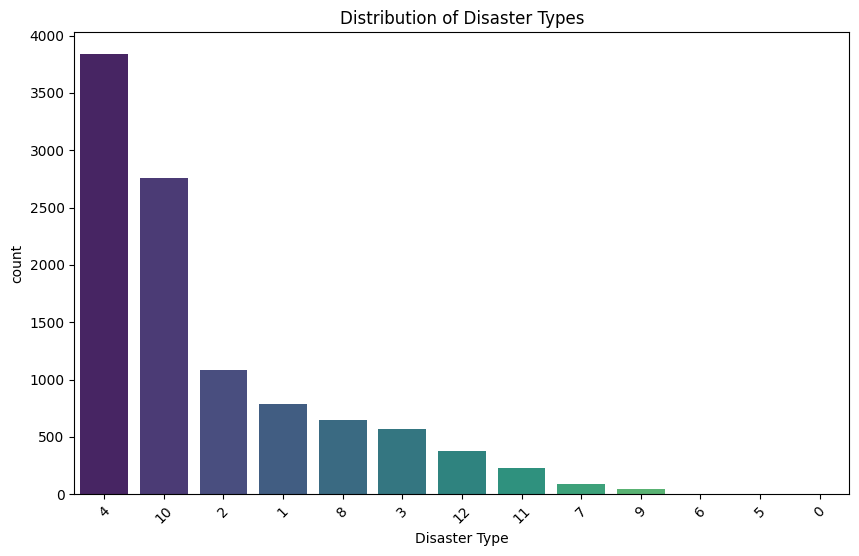

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Disaster Type", order=df["Disaster Type"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of Disaster Types")
plt.show()

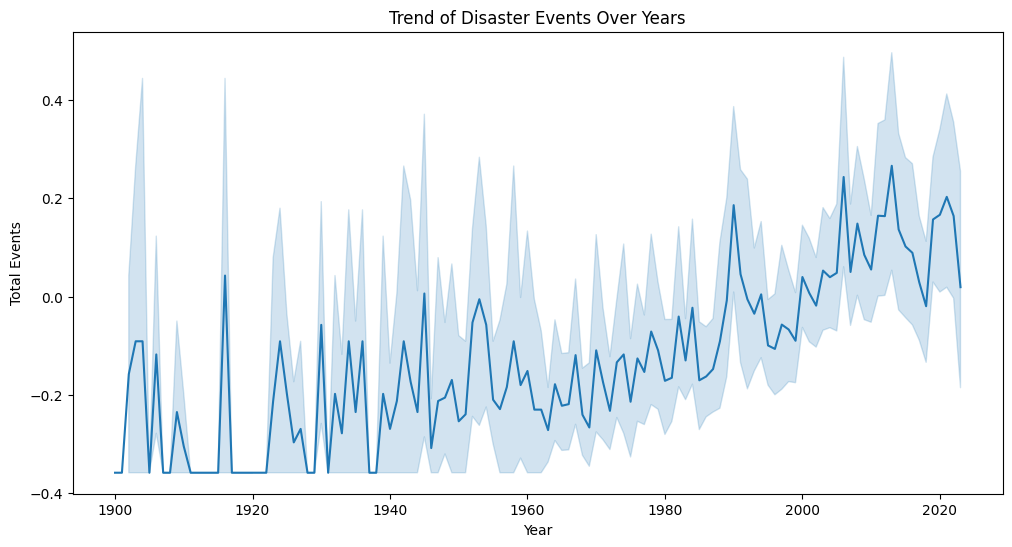

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Year", y="Total Events")
plt.title("Trend of Disaster Events Over Years")
plt.show()

/tmp/ipython-input-3552247532.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")


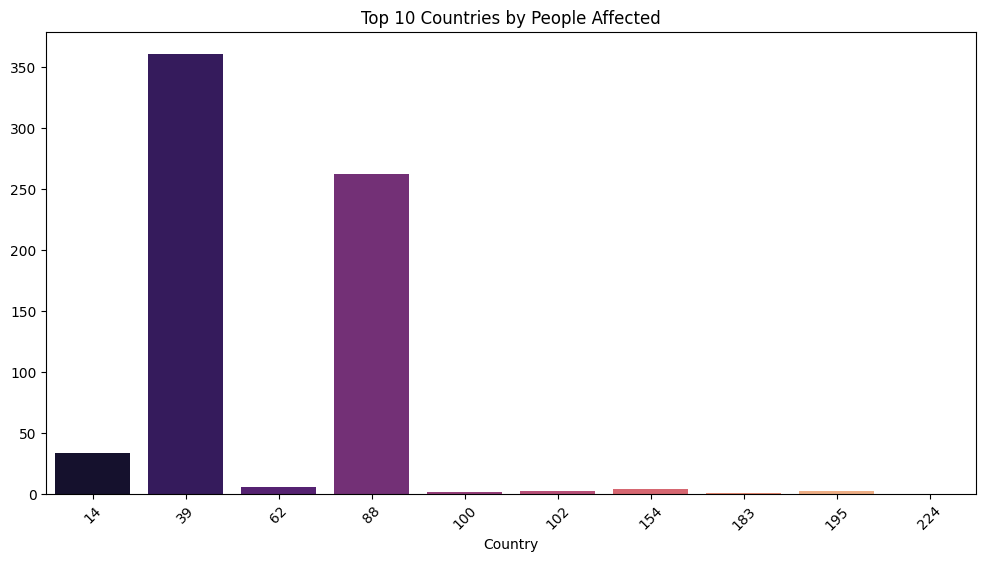

In [ ]:
top_countries = df.groupby("Country")["Total Affected"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")
plt.title("Top 10 Countries by People Affected")
plt.xticks(rotation=45)
plt.show()

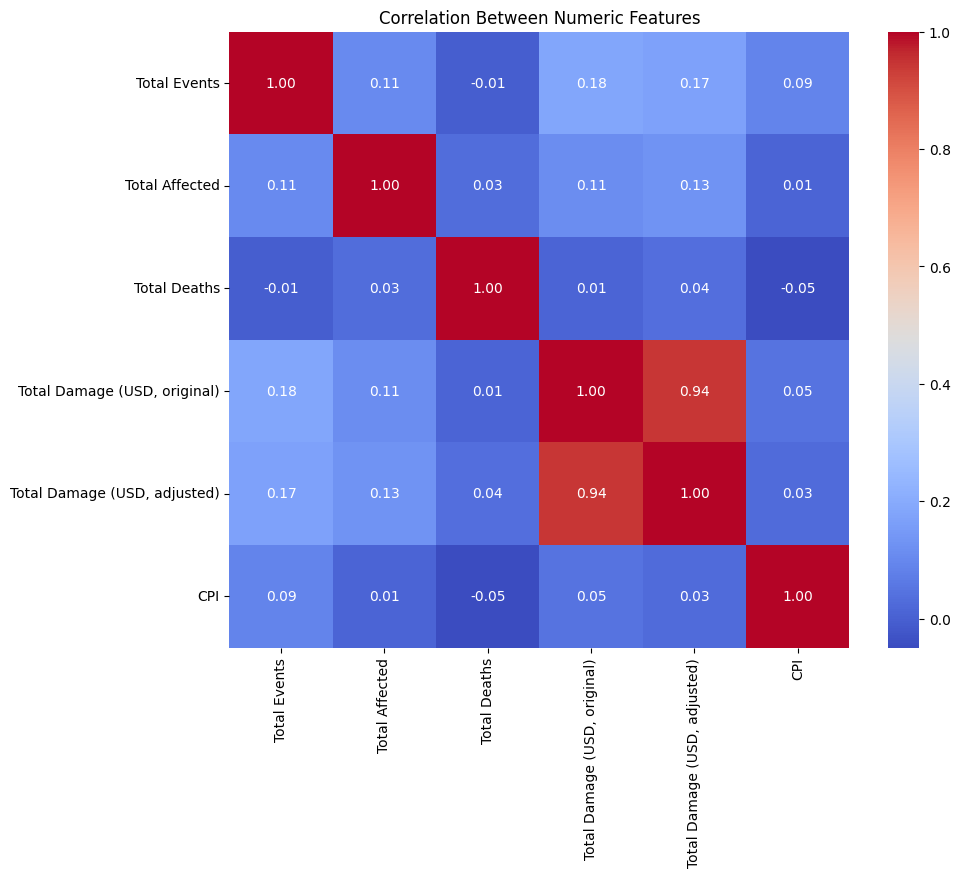

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_filtered['Disaster Type'])

X = df_filtered.drop(columns=['Disaster Type'])

In [ ]:
X = df.drop(columns=['Disaster Type'])
y = df['Disaster Type']

In [ ]:
y_counts = y.value_counts()
rare_classes = y_counts[y_counts < 2].index
df_filtered = df[~df['Disaster Type'].isin(rare_classes)]

X = df_filtered.drop(columns=['Disaster Type'])
y = df_filtered['Disaster Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9908916586768935

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       157
           2       0.97      1.00      0.98       218
           3       1.00      0.99      1.00       113
           4       0.99      1.00      0.99       768
           7       1.00      1.00      1.00        18
           8       1.00      0.93      0.96       130
           9       1.00      0.33      0.50         9
          10       1.00      1.00      1.00       552
          11       0.98      0.93      0.96        46
          12       0.99      1.00      0.99        75

    accuracy                           0.99      2086
   macro avg       0.99      0.92      0.94      2086
weighted avg       0.99      0.99      0.99      2086



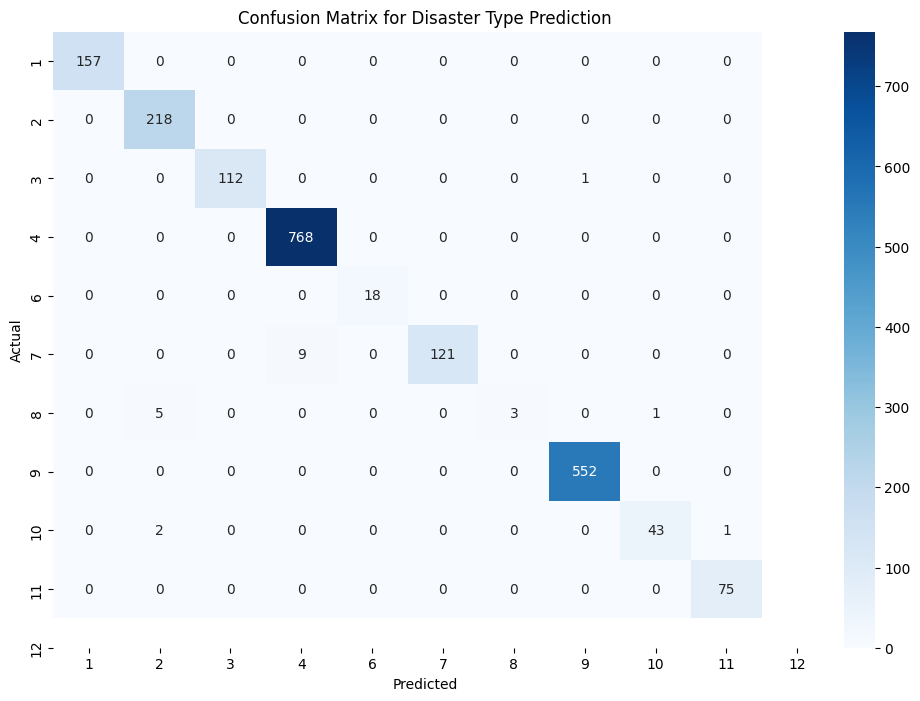

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Disaster Type Prediction")
plt.show()


In [86]:
import joblib

# Disaster Type model save
joblib.dump(model, "disaster_type_model.pkl")
joblib.dump(le_disaster, "disaster_type_encoder.pkl")
print("✅ Disaster Type Model and encoders saved")


✅ Disaster Type Model saved


In [ ]:
sample = X_test.iloc[[0]]
predicted_class = model.predict(sample)[0]
predicted_disaster = le_disaster.inverse_transform([predicted_class])[0]

print("\nSample Prediction:", predicted_disaster)


Sample Prediction: 11


In [63]:
from google.colab import files
uploaded = files.upload()

Saving Natural_Disasters_Emergency_Events_Database.csv to Natural_Disasters_Emergency_Events_Database (1).csv


In [67]:
print("Summary of severity-related columns:")
print(df[['Total Deaths', 'Total Affected', 'Total Damage (USD, adjusted)']].describe())

Summary of severity-related columns:
       Total Deaths  Total Affected  Total Damage (USD, adjusted)
count  1.043100e+04    1.043100e+04                  1.043100e+04
mean   2.197236e+03    8.188671e+05                  6.420800e+08
std    6.102373e+04    8.338960e+06                  5.586928e+09
min    0.000000e+00    0.000000e+00                  0.000000e+00
25%    0.000000e+00    0.000000e+00                  0.000000e+00
50%    9.000000e+00    2.202000e+03                  0.000000e+00
75%    5.000000e+01    4.508300e+04                  3.842655e+07
max    3.700000e+06    3.300000e+08                  2.732184e+11


In [64]:

df = pd.read_csv("Natural_Disasters_Emergency_Events_Database.csv", sep=";", engine="python")

df['Total Deaths'] = df['Total Deaths'].fillna(0)
df['Total Affected'] = df['Total Affected'].fillna(0)
df['Total Damage (USD, adjusted)'] = df['Total Damage (USD, adjusted)'].fillna(0)

In [65]:
df['Severity_Score'] = (
    df['Total Deaths'] * 0.5 +
    df['Total Affected'] * 0.3 +
    df['Total Damage (USD, adjusted)'] * 0.2
)

def categorize_severity(score):
    if score > 500:
        return 'High'
    elif score > 100:
        return 'Medium'
    else:
        return 'Low'

In [66]:
df['Severity'] = df['Severity_Score'].apply(categorize_severity)
print("\nSeverity distribution:")
print(df['Severity'].value_counts())


Severity distribution:
Severity
High      6906
Low       2646
Medium     879
Name: count, dtype: int64


In [68]:
le_severity = LabelEncoder()
df['Severity_Label'] = le_severity.fit_transform(df['Severity'])

print("Severity classes:", list(le_severity.classes_))


Severity classes: ['High', 'Low', 'Medium']


In [69]:
X = df[['Year', 'ISO', 'Disaster Group']]  # You can include more features if useful
y = df['Severity_Label']

# Encode 'Disaster Group' if it's categorical
le_group = LabelEncoder()
X.loc[:,'Disaster Group'] = le_group.fit_transform(X['Disaster Group'])

# Encode 'ISO' if it's categorical
le_iso = LabelEncoder()
X.loc[:,'ISO'] = le_iso.fit_transform(X['ISO'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split completed.")
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Data split completed.
Training set size: 8344
Testing set size: 2087


In [70]:
# Create the model
severity_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
severity_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = severity_model.predict(X_test)

# Evaluate the model
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_severity.classes_))


Accuracy on test set: 0.592237661715381

Classification Report:
              precision    recall  f1-score   support

        High       0.69      0.77      0.73      1369
         Low       0.37      0.31      0.34       546
      Medium       0.12      0.08      0.09       172

    accuracy                           0.59      2087
   macro avg       0.39      0.39      0.39      2087
weighted avg       0.56      0.59      0.57      2087



In [71]:
print("Severity distribution in the whole dataset:")
print(df['Severity'].value_counts())

Severity distribution in the whole dataset:
Severity
High      6906
Low       2646
Medium     879
Name: count, dtype: int64


In [87]:
# Severity model save
joblib.dump(severity_model, "severity_model.pkl")
joblib.dump(le_severity, "severity_encoder.pkl")
print("✅ Severity Model and Encoders saved")


✅ Severity Model and Encoders saved


In [97]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import joblib

# ======================
# Load Models & Encoders
# ======================
disaster_model = joblib.load("disaster_type_model.pkl")
severity_model = joblib.load("severity_model.pkl")

le_disaster = joblib.load("disaster_type_encoder.pkl")   # Disaster Type
le_severity = joblib.load("severity_encoder.pkl")        # Severity

# ======================
# Widgets for Input
# ======================
year = widgets.IntText(description="Year:", value=2025)
country = widgets.IntText(description="Country:", value=100)
iso = widgets.IntText(description="ISO:", value=356)
group = widgets.IntText(description="Group:", value=0)
subgroup = widgets.IntText(description="Subgroup:", value=0)
subtype = widgets.IntText(description="Subtype:", value=0)

total_events = widgets.FloatText(description="Total Events:", value=0.0)
total_affected = widgets.FloatText(description="Total Affected:", value=0.0)
total_deaths = widgets.FloatText(description="Total Deaths:", value=0.0)
damage_original = widgets.FloatText(description="Damage Orig:", value=0.0)
damage_adjusted = widgets.FloatText(description="Damage Adj:", value=0.0)
cpi = widgets.FloatText(description="CPI:", value=0.0)

predict_btn = widgets.Button(description="🔮 Predict", button_style="success")
output = widgets.Output()

# ======================
# Prediction Function
# ======================
def on_predict_clicked(b):
    with output:
        output.clear_output()

        # Prepare input dictionary
        input_dict = {
            "Year": year.value,
            "Country": country.value,
            "ISO": iso.value,
            "Disaster Group": group.value,
            "Disaster Subroup": subgroup.value,   # spelling same as dataset
            "Disaster Subtype": subtype.value,
            "Total Events": total_events.value,
            "Total Affected": total_affected.value,
            "Total Deaths": total_deaths.value,
            "Total Damage (USD, original)": damage_original.value,
            "Total Damage (USD, adjusted)": damage_adjusted.value,
            "CPI": cpi.value,
        }

        # ----------------------
        # Disaster Type Prediction
        # ----------------------
        X_type = pd.DataFrame([[input_dict[f] for f in disaster_model.feature_names_in_]],
                              columns=disaster_model.feature_names_in_)

        type_pred_num = disaster_model.predict(X_type)[0]
        type_probs = disaster_model.predict_proba(X_type)[0]

        # Predicted label
        type_pred = le_disaster.inverse_transform([type_pred_num])[0]

        # Probabilities with actual labels
        type_labels = le_disaster.inverse_transform(range(len(le_disaster.classes_)))
        type_prob_map = {str(label): float(round(prob, 2))
                         for label, prob in zip(type_labels, type_probs)}

        # ----------------------
        # Severity Prediction
        # ----------------------
        X_severity = pd.DataFrame([[input_dict[f] for f in severity_model.feature_names_in_]],
                                  columns=severity_model.feature_names_in_)

        severity_pred_num = severity_model.predict(X_severity)[0]
        severity_probs = severity_model.predict_proba(X_severity)[0]

        severity_pred = le_severity.inverse_transform([severity_pred_num])[0]
        severity_prob_map = {str(cls): float(round(prob, 2))
                             for cls, prob in zip(le_severity.classes_, severity_probs)}

        # ----------------------
        # Display Results
        # ----------------------
        print("✅ Predicted Disaster Type:", type_pred)
        print("📊 Type Probabilities:", type_prob_map)
        print("\n🔥 Predicted Severity:", severity_pred)
        print("📊 Severity Probabilities:", severity_prob_map)

# Connect button
predict_btn.on_click(on_predict_clicked)

# ======================
# Display UI
# ======================
display(year, country, iso, group, subgroup, subtype,
        total_events, total_affected, total_deaths,
        damage_original, damage_adjusted, cpi,
        predict_btn, output)


IntText(value=2025, description='Year:')

IntText(value=100, description='Country:')

IntText(value=356, description='ISO:')

IntText(value=0, description='Group:')

IntText(value=0, description='Subgroup:')

IntText(value=0, description='Subtype:')

FloatText(value=0.0, description='Total Events:')

FloatText(value=0.0, description='Total Affected:')

FloatText(value=0.0, description='Total Deaths:')

FloatText(value=0.0, description='Damage Orig:')

FloatText(value=0.0, description='Damage Adj:')

FloatText(value=0.0, description='CPI:')

Button(button_style='success', description='🔮 Predict', style=ButtonStyle())

Output()